In [1]:
import matplotlib.pyplot as plt
import scrapping as sc
from formatage import Resume, Intro, Qualif
import formatage as ft
from nettoyage import Fixe
import nettoyage as nt
from competition import Tournement
import competition as cp
import machine_learning as ml
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# But et explication du projet

Le but du projet est d'anticiper les futurs affluence de supporters pour la prochaine coupe du monde, idéalement on voudrait savoir quel match aura le plus de supporters : intéressant en vue d'une variation du prix du billet, évidement il faudra au préalable s'arranger pour prédire les futurs matchs qui auront lieu et les gagnants qui en découleront.

Le fonctionnement du code est de la sorte par ordre de priorité : 
- scrapping.py : Qui contient le scrapping des données de coupe du monde ainsi que les qualifications par continent stockés sous forme de backup html.

- formatage.py :  Qui prend chaque backup coupe du monde ou qualification et le transforme en dataframe exploitable.

- nettoyage.py :  Qui fixe de nouvelles colonnes, enlève les abbérations, rajoute des manquements ...

- competition.py : Qui simule les équipes jouant l'une contre l'autre afin de prédire depuis les huitièmes de finale l'arbre de compétition qui en découlera (théoriquement).

- machine_learning.py : Qui effectue donc les méthodes de machine learning sur les supporters présent lors d'anciennes coupe du monde afin de trouver le modèle le plus performant, puis de prédire avec ce modèle les futurs supporters issues de l'arbre de compétition prédit par competition.py.

Ainsi l'ordre de priorité des .py est le suivant : scrapping > formatage > nettoyage > competition > machine_learning.


## Scrapping et backup code html de chaque cdm

In [ ]:
lien = "http://www.footballstats.fr/"

In [ ]:
creation_backup_cdm(lien)

## Scrapping et backup code html de chaque qualifications de continent

In [72]:
lien = "http://www.lequipe.fr/"

In [ ]:
creation_backup_Qualif(lien)

# DataFrame de toutes les coupes pour toutes les années

In [2]:
Debut=1930
Fin=2018
an = Intro.annee(Debut, Fin)

In [3]:
code = Intro.all_coupe(Debut,Fin)

In [4]:
data = Resume.data(code)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\formatage.py:57: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 57 of the file C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\formatage.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soupe_all=BS(code[annee])


# Fixage d'années

In [5]:
Fixe.fixe_annee(data, an)

In [6]:
Fixe.enleve_n(data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\nettoyage.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(869,0,inplace=True)


## Injection des lignes manquantes

In [7]:
Fixe.fixe_manque(data)

## Instauration des situations de match

In [8]:
data = Fixe.fixe_situation(data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\nettoyage.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdm1930["Situation"]=""
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\nettoyage.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdm1930["Situation"][0:15]= cdm1930["Situation"][0:15].replace("","Poule")
C:\Users\pycar\anaconda3\lib\site-packages\pandas\core\series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

## Pays Organisateur

In [9]:
Fixe.fixe_lieu(data)

,lieu,equipe_1,equipe_2,score,affluence,Annee,Situation
0,Uruguay,France,Mexique,4-1,1000,1930,Poule
1,Uruguay,Argentine,France,1-0,3000,1930,Poule
2,Uruguay,Chili,Mexique,3-0,500,1930,Poule
3,Uruguay,Chili,France,1-0,2000,1930,Poule
4,Uruguay,Argentine,Mexique,6-3,5000,1930,Poule
...,...,...,...,...,...,...,...
872,Russie,Russie,Croatie,2-2,44287,2018,1/4F
873,Russie,Croatie,Angleterre,2-1,78011,2018,1/4F
874,Russie,France,Belgique,1-0,64286,2018,1/2F
875,Russie,Belgique,Angleterre,2-0,64406,2018,Troisieme


# Reconstitution groupe de la futur coupe du monde 2022

Nous avons donc nos données de toutes les coupes du monde, il nous faut maintenant les groupes actuel pour la prochaine coupe du monde, actuellement les qualifications sont toujours actualité, il faut donc reconstituer les groupes de poules pour chaque continent.

De même que les places disponible au nombre de 26 sont scindés entre chaque continent :

- Europe (UEFA) : 13
- Afrique (CAF) : 5
- Amérique du Sud (CONMEBOL) : 5
- Asie avec Australie (AFC) : 4
- Amérique du Nord, Centrale et Caraïbes (CONCACAF) : 3
- Océanie (OFC) : 2

Prenons le cas de l'Europe qui dispose de 13 places, les 10 places sont les premiers de chaque groupes puis les 2ème de chaque groupe se disputent les 3 places restantes, nous allons simplement scrapper les groupes des chaque continent qualifié automatiquement les premiers et regarder ceux qui ont le plus grand nombre de points dans les deuxième (le scrapping sera appliqué uniquement à l'europe car les autres continent cela reviens à faire un code qui alourdit le notebook en y rajoutant 4 lignes pour la plus part, on privilégiera l'insertion manuelle.

La seule hypothèse ici viens du fait que certains match n'on pas encore été joué par tout le monde, mais au vu du classement il y devrait avoir peu de surprise (comme nous arrivons aux fins de qualification certaines équipes n'ont pas joué leurs derniers match, mais comme elles jouent contre le dernier de leur groupe les places ne devraient donc pas trop bouger).

In [10]:
Qualif.team_qualifie(data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\formatage.py:128: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 128 of the file C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\formatage.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  code_cont = BS(code_continent)


0              Serbie
5             Espagne
10             Suisse
15             France
20           Belgique
25           Danemark
31           Pays-Bas
37            Croatie
43         Angleterre
49          Allemagne
26             Écosse
38             Russie
1            Portugal
0              Canada
1          États-Unis
2             Mexique
0              Brésil
1           Argentine
2            Equateur
3            Colombie
4               Pérou
25              Japon
5           Australie
20              Qatar
46    Arabie saoudite
40               Iran
35       Corée du Sud
32              Maroc
16               Mali
28            Sénégal
12           Cameroun
0             Algérie
Name: Equipe, dtype: object

# Placement des équipes aux groupes de poules

Notre seule hypothèse vient du faire que les 32 équipes subissent un tirage au sort pour déterminer leurs groupes de poule, actuellement le tirage au sort n'a pas été effectué, nos effectuons (informatiquement) un tirage au sort, mais celui-ci peut drastiquement se différentier par rapport au vrai tirage qui aura lieu en avril 2022.

In [11]:
Qualifier = Qualif.team_qualifie(data)
Tournement.tirage_aleatoire(Qualifier)

['Sénégal',
 'Colombie',
 'France',
 'Angleterre',
 'Suisse',
 'Croatie',
 'Russie',
 'Cameroun',
 'Belgique',
 'Mali',
 'Canada',
 'Qatar',
 'Algérie',
 'Maroc',
 'Mexique',
 'Equateur',
 'Japon',
 'Brésil',
 'Portugal',
 'Allemagne',
 'Pérou',
 'Écosse',
 'Espagne',
 'Iran',
 'Corée du Sud',
 'Pays-Bas',
 'Argentine',
 'États-Unis',
 'Danemark',
 'Arabie saoudite',
 'Serbie',
 'Australie']

Ici on a privilégié une liste déjà établit qui par chance à le Quatar en première position, mais à la place on peut très simplement mettre Poule = Tournement.tirage_aleatoire(Qualifier) en s'arrangeant d'avoir toujours le Quatar en première position.

In [12]:
Poule=['Qatar','Algerie','Pays-Bas','Equateur','Mali','Mexique','etats-Unis','Danemark','Iran',
 'Suisse','Portugal','Ecosse','Maroc','Espagne','Australie','Cameroun','Allemagne','Arabie saoudite',
 'Croatie','Angleterre','Colombie','France','Coree du Sud','Bresil','Canada','Japon','Argentine','Serbie',
 'Senegal','Russie','Belgique','Perou']

In [13]:
for x in range(0,31,4):
    a=len(data[(data["equipe_1"]==Poule[x]) | (data["equipe_2"]==Poule[x])])
    b=len(data[(data["equipe_1"]==Poule[x+1]) | (data["equipe_2"]==Poule[x+1])])
    c=len(data[(data["equipe_1"]==Poule[x+2]) | (data["equipe_2"]==Poule[x+2])])
    d=len(data[(data["equipe_1"]==Poule[x+3]) | (data["equipe_2"]==Poule[x+3])])
    print("La nation " + Poule[x] + " s'est présenté " + str(a) + " fois.")
    print("La nation " + Poule[x+1] + " s'est présenté " + str(b) + " fois.")
    print("La nation " + Poule[x+2] + " s'est présenté " + str(c) + " fois.")
    print("La nation " + Poule[x+3] + " s'est présenté " + str(d) + " fois.")
    print("---------------------------------------------------------------")

La nation Qatar s'est présenté 0 fois.
La nation Algerie s'est présenté 10 fois.
La nation Pays-Bas s'est présenté 50 fois.
La nation Equateur s'est présenté 10 fois.
---------------------------------------------------------------
La nation Mali s'est présenté 0 fois.
La nation Mexique s'est présenté 57 fois.
La nation etats-Unis s'est présenté 0 fois.
La nation Danemark s'est présenté 20 fois.
---------------------------------------------------------------
La nation Iran s'est présenté 12 fois.
La nation Suisse s'est présenté 38 fois.
La nation Portugal s'est présenté 27 fois.
La nation Ecosse s'est présenté 23 fois.
---------------------------------------------------------------
La nation Maroc s'est présenté 16 fois.
La nation Espagne s'est présenté 62 fois.
La nation Australie s'est présenté 15 fois.
La nation Cameroun s'est présenté 23 fois.
---------------------------------------------------------------
La nation Allemagne s'est présenté 106 fois.
La nation Arabie saoudite s'est 

Pour selectionner les 2 meilleurs, ont regarde globalement leur qualifications aux coupe du monde en general, on prend l'exemple de l'Allemagne quasi tout le temps présente contre le Cameroun avec tres peu de données., en cas d'égalité on regarde jusqu'ou à chaque participation ils sont allé.

In [14]:
Groupe_A = ["Pays-Bas","Algerie"]
Groupe_B = ["Mexique", "Danemark"]
Groupe_C = ["Portugal","Suisse"]
Groupe_D = ["Espagne" , "Maroc"]
Groupe_E = ["Allemagne" , "Angleterre"]
Groupe_F = ["Bresil", "France" ]
Groupe_G = ["Argentine" , "Japon"]
Groupe_H = ["Belgique" , "Russie"]

# Huitieme

In [15]:
Huitieme = [Groupe_A[0],Groupe_B[1],Groupe_C[0],Groupe_D[1],Groupe_D[0],Groupe_C[1],Groupe_B[0],Groupe_A[1],
            Groupe_E[0],Groupe_F[1],Groupe_G[0],Groupe_H[1],Groupe_F[0],Groupe_E[1],Groupe_H[0],Groupe_G[1]]

In [16]:
Tournement.But(Huitieme,data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,lieu,equipe_1,equipe_2,score,affluence,Annee,Situation,But_marque,But_pris
242,Allemagne,Pays-Bas,Suede,0-0,53700,1974,Poule,0,0
244,Allemagne,Pays-Bas,Bulgarie,4-1,52100,1974,Poule,4,1
247,Allemagne,Pays-Bas,Uruguay,2-0,53700,1974,Poule,2,0
254,Allemagne,Pays-Bas,Bresil,2-0,52500,1974,1/8F,2,0
257,Allemagne,Pays-Bas,RDA,2-0,67148,1974,1/8F,2,0
...,...,...,...,...,...,...,...,...,...
729,Afrique du Sud,Danemark,Japon,1-3,27967,2010,Poule,3,1
732,Afrique du Sud,Pays-Bas,Japon,1-0,62010,2010,Poule,0,1
753,Afrique du Sud,Paraguay,Japon,0-0,36742,2010,1/8F,0,0
783,Bresil,Cote d'Ivoire,Japon,2-1,40267,2014,Poule,1,2


## Force d'attaque  et de défense de chaque équipe

La force d'attaque est la moyenne de chaque de but de chaque équipe par match divisé par la moyenne de but par match de toutes les équipes.

La force de défense est la moyenne de chaque but encaissé de chaque équipe par match divisé par la moyenne de but encaissé de toutes les équipes.

Ainsi une équipe qui marque 1 but en moyenne mais qui à une force de défense proche de 0 peut complètement gagner sur une équipe qui marque en moyenne 3 buts et qui à chaque match peut se prendre 5 buts.


REMARQUE : Comme toutes les équipes jouent à l'extérieure (Quatar) il ne faut pas prendre en compte les buts marqués et concédés à domicile, seul le Quatar aurait bénéficié de calculer sa force d'attaque et défense à domicile puisque la compétition se déroule exclusivement dans son pays.

Exemple les huitièmes de finale se jouent entre les Pays-Bas et l'Algérie :

- On calcule la force d'attaque et défense globales de la compétition ( la moyenne des buts marqué et des buts concédés ).

- On calcule la force d'attaque de l'Agérie (0.71) et celle des Pays-Bas (0.91).

- On calcule la force de défense de l'Algérie (1) et celle des Pays-Bas (0.91).

- Le nombre potentiel de but d'une équipe i est la force d'attaque i * la force de défense de l'adversaire * la force d'attaque globale de la compétition.

- Le résultat est l'évènement "but" espéré de l'équipe i, il représente la paramètre d'une loi de Poisson.

- On utilise la loi de Poisson pour calculer les probabilités d'avoir k but avec les espérances de buts calculée auparavant, ainsi on peut voir quelles seront les résultats possible.

Formule de la loi de Poisson : $f (k;\lambda)=\frac{\lambda^k\exp^{-\lambda}}{k!}$


On prédit jusqu'a 5 but par équipe (donc toutes les combinaisons de 0-0 à 5-5), comme nous sommes en huitième de final, nous sommes obligé d'avoir un gagnant.

In [17]:
Tournement.Match_huit(Huitieme,data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,But,Pays-Bas,Danemark,Portugal,Maroc,Espagne,Suisse,Mexique,Algerie,Allemagne,France,Argentine,Russie,Bresil,Angleterre,Belgique,Japon
0,0,0.230,0.219,0.229,0.415,0.163,0.247,0.237,0.276,0.117,0.119,0.170,0.148,0.231,0.329,0.213,0.290
1,1,0.568,0.551,0.567,0.780,0.458,0.593,0.578,0.631,0.369,0.373,0.472,0.430,0.569,0.695,0.542,0.649
2,2,0.817,0.804,0.816,0.940,0.726,0.834,0.824,0.860,0.638,0.643,0.739,0.700,0.817,0.898,0.797,0.871
3,3,0.938,0.932,0.938,0.988,0.889,0.947,0.942,0.958,0.831,0.834,0.896,0.872,0.939,0.973,0.928,0.963
4,4,0.983,0.981,0.983,0.998,0.962,0.986,0.984,0.990,0.934,0.935,0.966,0.955,0.983,0.994,0.979,0.991
5,5,0.996,0.995,0.996,1.000,0.989,0.997,0.996,0.998,0.978,0.979,0.990,0.986,0.996,0.999,0.995,0.998


In [18]:
Match_huit=Tournement.Match_huit(Huitieme,data)
Tournement.Gagnant_Huitieme(Match_huit)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

['Danemark',
 'Portugal',
 'Espagne',
 'Mexique',
 'Allemagne',
 'Russie',
 'Bresil',
 'Belgique']

# Quart

In [19]:
Quart=Tournement.Gagnant_Huitieme(Match_huit)

In [20]:
Tournement.Match_quart(Quart,data,Huitieme)

,But,Danemark,Portugal,Espagne,Mexique,Allemagne,Russie,Bresil,Belgique
0,0,0.257,0.222,0.115,0.211,0.127,0.103,0.124,0.270
1,1,0.607,0.556,0.364,0.539,0.388,0.336,0.384,0.624
2,2,0.844,0.808,0.633,0.795,0.659,0.602,0.654,0.855
3,3,0.951,0.934,0.827,0.927,0.845,0.804,0.842,0.956
4,4,0.987,0.981,0.932,0.979,0.941,0.919,0.939,0.989
5,5,0.997,0.995,0.977,0.995,0.981,0.971,0.980,0.998


In [21]:
Match_Quart = Tournement.Match_quart(Quart,data,Huitieme)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

In [22]:
Tournement.Gagnant_Quart(Match_Quart)

['Portugal', 'Espagne', 'Russie', 'Bresil']

# Demi

In [23]:
Demi = Tournement.Gagnant_Quart(Match_Quart)

In [24]:
Tournement.Match_demi(Demi,data,Huitieme)

,But,Portugal,Espagne,Russie,Bresil
0,0,0.211,0.279,0.183,0.142
1,1,0.540,0.636,0.493,0.419
2,2,0.795,0.863,0.757,0.689
3,3,0.927,0.959,0.907,0.865
4,4,0.979,0.990,0.970,0.951
5,5,0.995,0.998,0.992,0.985


In [25]:
Match_Demi = Tournement.Match_demi(Demi,data,Huitieme)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

In [26]:
Tournement.Gagnant_Demi(Match_Demi)

['Portugal', 'Bresil']

# Finale

In [27]:
Finalistes = Tournement.Gagnant_Demi(Match_Demi)

In [28]:
Tournement.Match_final(Finalistes,data,Huitieme)

,But,Portugal,Bresil
0,0,0.256,0.241
1,1,0.605,0.584
2,2,0.842,0.828
3,3,0.950,0.944
4,4,0.987,0.985
5,5,0.997,0.997


In [29]:
Match_Finalistes = Tournement.Match_final(Finalistes,data,Huitieme)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

In [30]:
Tournement.Gagnant_CoupeDuMonde_2022(Match_Finalistes)

'La phase finale se déroule entre : Bresil et Portugal, le gagnant est Bresil.'

# Troisieme

In [31]:
Tournement.Gagnant_troisieme(Demi,Finalistes,Huitieme,data)

'La troisième place se joue entre Espagne et Russie le troisième est donc : Russie.'

# Machine Learning sur l'affluence des supporters

Maintenant que nous avons une approximation des futurs équipes qui vont s'affronter nous pouvons pratiquer des modèles de machine learning pour prédire au mieux les supporters des futurs matchs, bien que le tirage au sort va différer les équipes, la méthode sera la même.

La variable cible est : l'affluence de supporter

Ceci peut s'expliquer par :

- L'équipe qui joue.
- L'année de la coupe du monde.
- La situation

Avant ça on regarde l'affluence par année et lieu pour se faire une idée.

<function matplotlib.pyplot.show(close=None, block=None)>

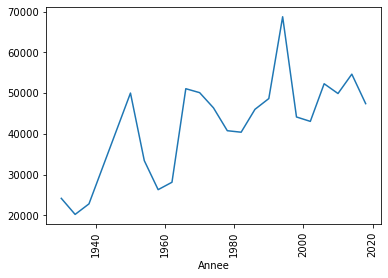

In [32]:
data.groupby("Annee")["affluence"].mean().plot()
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

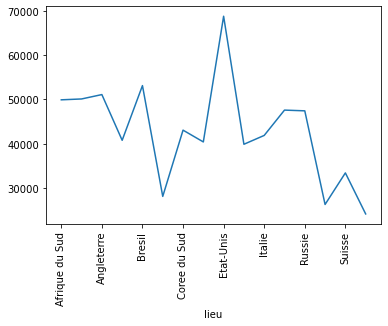

In [33]:
data.groupby("lieu")["affluence"].mean().plot()
plt.xticks(rotation=90)
plt.show

Avant de se lançer dans le machine learning, on recode les variables.

In [34]:
Fixe.fixe_ratio_dummies(Huitieme, data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,affluence,Team1_Afrique du Sud,Team1_Algerie,Team1_Allemagne,Team1_Angleterre,Team1_Angola,Team1_Arabie Saoudite,Team1_Argentine,Team1_Australie,Team1_Autriche,...,Year_2006,Year_2010,Year_2014,Year_2018,Pos_1/2F,Pos_1/4F,Pos_1/8F,Pos_Finale,Pos_Poule,Pos_Troisieme
0,53700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,52100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,52500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,67148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,27967,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
666,62010,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
667,36742,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
668,40267,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
df_final = Fixe.fixe_ratio_dummies(Huitieme, data)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

In [36]:
df_final.corr()[['affluence']].tail(6)

,affluence
Pos_1/2F,0.144363
Pos_1/4F,0.009996
Pos_1/8F,0.040920
Pos_Finale,0.261432
Pos_Poule,-0.195778
Pos_Troisieme,-0.005025


Les corrélations intéréssantes sont celles comprenant les situations, on remarque que plus on avance vers la finale plus le lien entre le nombre de supporter et la situation semble augmenter.

In [37]:
X = df_final.drop(['affluence'], axis=1)
y = df_final['affluence']

In [38]:
X_train, X_test, y_train, y_test = ml.prepare_donnees(X, y)

In [39]:
modele = ml.trouve_meilleur_modele(X_train, y_train)

C:\Users\pycar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pycar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pycar\anaconda3\lib\site-packages\sklearn\dummy.py", line 503, in fit
    raise ValueError("Quantile must be a scalar in the range "
ValueError: Quantile must be a scalar in the range [0.0, 1.0], but got None.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pycar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pycar\anacon

In [40]:
modele

,model,best_score,best_params
0,DummyRegressor,-1.001410e-02,{'strategy': 'mean'}
1,Linear Regression,-3.950064e+23,{'fit_intercept': False}
2,Lasso,2.377247e-01,"{'alpha': 10.0, 'fit_intercept': True, 'max_it..."
3,Ridge,2.933102e-01,"{'alpha': 10.0, 'fit_intercept': True, 'solver..."
4,ElasticNet,3.158393e-01,"{'alpha': 0.1, 'fit_intercept': True, 'l1_rati..."
5,KNeighborsRegressor,2.323820e-01,{'n_neighbors': 11}
6,Random Forest,4.731835e-01,{'n_estimators': 300}
7,SVR,3.212031e-01,"{'C': 10000, 'epsilon': 10.0}"


Globalement les modèles ont un score décevant néanmoins le méthode par forêt aléatoire semble être la plus intéréssante avec 300 estimateurs et un score de 0.47.

# Mesure de la qualité du modèle

In [41]:
Best_model = RandomForestRegressor(n_estimators = 300)

Une fois que nous avons un modèle favori, qui nous dit que le nombre d'estimateur est cohérent ? Qui nous dit qu'avec un autre scindement des données de maniere aléatoires on aurait peut etre une forêt aléatoire plus performante ? C'est a ce genre de question que répond la cross-validation.

In [42]:
ml.affiche_scores_meilleur_modele(Best_model,X_train, y_train, X_test, y_test)

Moyenne du score des données d'entraînement : 0.47
Score des données de test : 0.61


Globalement les scores sont proches, notre modèle prédit une fois deux correctement dans "la vraie vie".

In [43]:
ml.calcule_mae(Best_model, y_test, X_test)

Erreur moyenne absolue :  9326.15


Notre modèle prédit donc avec une une moyenne d'écart 9326 ce qui témoigne d'un assez grand écart entre la réalité et les prédictions.

In [45]:
ml.prediction_donnees_test(Best_model, X_train, y_train, y_test, X_test)

,Réalité,Prédiction,Écart
361,42873,45063.0,2190.0
158,43866,45512.0,1646.0
480,50000,60757.0,10757.0
640,52959,66576.0,13617.0
275,75000,60625.0,-14375.0
362,64286,66665.0,2379.0
310,27162,25224.0,-1938.0
199,33425,44598.0,11173.0
523,54096,45497.0,-8599.0
90,28000,26128.0,-1872.0


On voit que certain Écart sont assez important, néanmois il serait intéréssant de voir quelle année est souvent mal prédite.

In [46]:
ml.trouve_annee_ecart(Best_model, X_train, y_train, X_test, y_test)

Year_1982
Year_2010
Year_1938
Year_1986
Year_2018
Year_2018
Year_2018
Year_2010
Year_1974
Year_1994


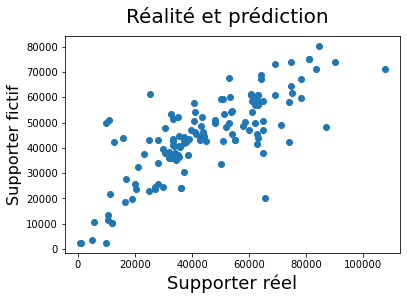

In [47]:
ml.affiche_nuage_prediction(Best_model, X_train, y_train, X_test, y_test)

On remarque tout de suite que quelques point semble se détâcher du lot et sont mal prédit, globalement on remarque tout de même une certaine tendance.

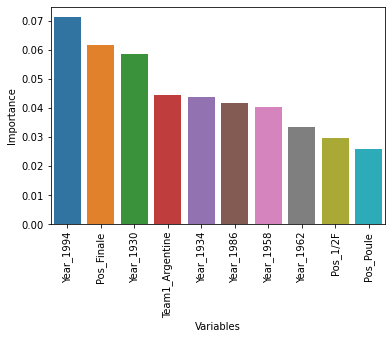

In [49]:
ml.affiche_var_importantes(Best_model, X_train, y_train)

Enfin on conclut en s'interessant à la courbe d'apprentissage, en effet on aimerai savoir si le fait d'avoir plus de données nous aurait permis d'avoir un score plus élevé.

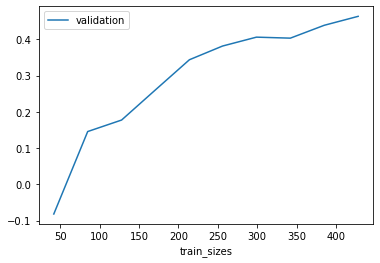

In [50]:
ml.courbe_apprentissage(Best_model, X_train, y_train)

Il s'avère que le fait d'avoir plus de données pourrait nous faire avoir un meilleur score étant donné la pente de la courbe.

# Futur supporter théorique de la prochaine coupe du monde 

In [51]:
ml.prediction_huit(data,Huitieme,Best_model)


C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,equipe_1,equipe_2,Annee,Situation,affluence_attendue
0,Pays-Bas,Danemark,2022,1/8F,57441.52
1,Portugal,Maroc,2022,1/8F,53960.23
2,Espagne,Suisse,2022,1/8F,45739.26
3,Mexique,Algerie,2022,1/8F,42628.43
4,Allemagne,France,2022,1/8F,52052.05
5,Argentine,Russie,2022,1/8F,48251.20
6,Bresil,Angleterre,2022,1/8F,44867.32
7,Belgique,Japon,2022,1/8F,44152.33


In [52]:
ml.prediction_quart(data,Huitieme,Quart,Best_model)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,equipe_1,equipe_2,Annee,Situation,affluence_attendue
0,Danemark,Portugal,2022,1/4F,54336.25
1,Espagne,Mexique,2022,1/4F,46193.41
2,Allemagne,Russie,2022,1/4F,50817.90
3,Bresil,Belgique,2022,1/4F,42730.63


In [53]:
ml.prediction_demi(data,Huitieme,Demi,Best_model)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,equipe_1,equipe_2,Annee,Situation,affluence_attendue
0,Portugal,Espagne,2022,1/2F,56888.22
1,Russie,Bresil,2022,1/2F,56251.33


In [54]:
ml.prediction_finale(data,Huitieme,Finalistes,Best_model)

C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selec["But_marque"], Selec["But_pris"] = Selec["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\Semestre 1\Machine Learning\competition.py:35: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Selec_bis["But_pris"], Selec_bis["But_marque"] = Selec_bis["score"].str.split("-", 1).str
C:\Users\pycar\Documents\Master\M2\S

,equipe_1,equipe_2,Annee,Situation,affluence_attendue
0,Portugal,Bresil,2022,Finale,74720.55
